# Week 0: Introduction to Deep Learning Frameworks

## Notebook 3: CIFAR Classification with a Convolutional Neural Network on Keras

Welcome to the last notebook of the deep learning frameworks week. In this notebook we will train a convolutional neural network on Keras. We are changing our dataset to CIFAR-10 this time. This dataset contains RGB images belonging to 10 classes such as airplane, car, and, bird.

## 0. Problem Definition

In this notebook, our problem is once more... (you guessed it!) **classification**. However, this time we are using the [Cifar10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset. This is another widely used classification dataset but the images are colored and the categories are different than MNIST.

## 1. Install Keras

If you already installed TensorFlow, you also have Keras installed! Keras completely works with TensorFlow as its backend and provides a high-level API to build and train neural networks.

If you did not install TensorFlow, simply run the command:

    pip install tensorflow
    
Now let's move on to our imports:

## 2. Imports

As always, we start with our necessary imports.

In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import math
import random

## 3. Data Preparation

Keras also has a dataset API that lets you download and directly use some famous datasets. Luckily, Cifar10 is one of them. We load the dataset by running the following cell:

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 70s 0us/step


We check the shapes of the dataset below:

In [4]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


We move on to visualize the first training image using `matplotlib` and also print its label:

[6]


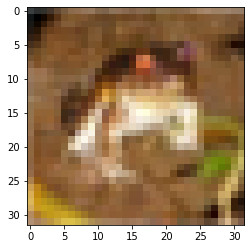

In [5]:
plt.imshow(x_train[0])
print(y_train[0])

We check and see that the maximum and minimum pixel values:

In [6]:
print(np.amax(x_train[0]),np.amin(x_train[0]))
print(np.amax(y_train),np.amin(y_train))

255 0
9 0


Below we normalize the data and cast the pixel values to `float32`. We use the `to_categorical` function of Keras to obtain one-hot vectors of the labels:

In [7]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

Now that our data is ready, let's move on to building the model.

## 4. Model Creation

We use Keras Sequential API to build our model. We have three convolutional layers along with max pooling, dropout, and batch normalization operations. At the end, we have a flatten layer and a final dense layer with a `softmax` activation to get the probabilities for each class. 

In [8]:
from keras.layers import Conv2D, BatchNormalization, Dropout, Dense, Flatten, MaxPool2D
from keras.models import Sequential

inzvaNet = Sequential()

inzvaNet.add(BatchNormalization())
inzvaNet.add(Conv2D(64,(5,5),activation = 'tanh', padding = 'same'))
inzvaNet.add(MaxPool2D())
inzvaNet.add(Dropout(0.2))

inzvaNet.add(BatchNormalization())
inzvaNet.add(Conv2D(128,(5,5),activation = 'tanh', padding = 'same'))
inzvaNet.add(MaxPool2D())
inzvaNet.add(Dropout(0.2))

inzvaNet.add(BatchNormalization())
inzvaNet.add(Conv2D(256,(5,5),activation = 'tanh', padding = 'same'))
inzvaNet.add(MaxPool2D())
inzvaNet.add(Dropout(0.2))

inzvaNet.add(Flatten())
inzvaNet.add(Dense(10,activation = 'softmax'))

We create the optimizer and compile our network to make it ready for training:

In [9]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate = 0.001)

inzvaNet.compile(optimizer = opt,
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

## 5. Training

Training is only one line with Keras! We run the `fit` function with the necessary arguments and Keras starts the training.

In [10]:
inzvaNet.fit(x_train, y_train, batch_size=100, epochs=4, validation_split = 0.1)

Epoch 1/4
450/450 [==============================] - 8s 18ms/step - loss: 1.6187 - accuracy: 0.4594 - val_loss: 1.4143 - val_accuracy: 0.5266
Epoch 2/4
450/450 [==============================] - 8s 18ms/step - loss: 1.2049 - accuracy: 0.5885 - val_loss: 1.0154 - val_accuracy: 0.6494
Epoch 3/4
450/450 [==============================] - 8s 18ms/step - loss: 1.0556 - accuracy: 0.6433 - val_loss: 1.0145 - val_accuracy: 0.6664
Epoch 4/4
450/450 [==============================] - 8s 18ms/step - loss: 0.9643 - accuracy: 0.6749 - val_loss: 0.9948 - val_accuracy: 0.6752- l - ETA: 4s -


## 6. Evaluation

Let's run the evaluation and see the accuracy of our model:

In [11]:
inzvaNet.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.0369 - accuracy: 0.6562


[1.0369279384613037, 0.6561999917030334]

Finally, let's see some of the predictions of the model along with their ground truth values:

1
1


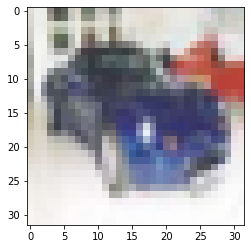

In [12]:
randind = int(random.random() * 1000)
plt.imshow(x_test[randind])
print(np.argmax(inzvaNet.predict(x_test[[randind]])))
print(np.argmax(y_test[randind]))

Congratulations! You made it through the framework notebooks 🎉 🎊.

We strongly encourage you to to through the documentation of each framework and go through some other examples, as well.

See you at the first week of the program!

**Bonus - Try to:**

- Get a test image
- Plot the image
- Make a model prediction on the image
- Print the predicted label and the actual label!